In [1]:
import os
from google.colab import files
uploaded = files.upload()
print(os.getcwd())

Saving TCS1.CSV to TCS1.CSV
/content


In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

**Loading the DATA file**

In [60]:
df = pd.read_csv("TCS1.CSV")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,88.088272,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,90.293549,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,90.416122,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,90.397820,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,90.924896,21356352.0
...,...,...,...,...,...,...,...
4489,2022-10-18,3150.000000,3155.350098,3128.550049,3144.699951,3144.699951,1793722.0
4490,2022-10-19,3159.000000,3159.000000,3112.000000,3121.850098,3121.850098,1194289.0
4491,2022-10-20,3105.000000,3160.000000,3105.000000,3157.300049,3157.300049,1587601.0
4492,2022-10-21,3157.800049,3160.399902,3127.000000,3137.399902,3137.399902,1021913.0


# Data Processing

In [4]:
df.shape

(4494, 7)

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4.486000e+03
mean,1146.182768,1158.538059,1132.825428,1145.521462,1049.456965,3.620596e+06
std,994.070086,1003.010607,984.043404,993.346465,992.062558,3.162368e+06
min,112.000000,116.112503,103.837502,111.550003,86.565590,0.000000e+00
25%,290.693748,295.300010,285.931259,290.275009,219.902748,1.942489e+06
50%,977.450012,995.000000,970.250000,981.337524,820.627839,2.804749e+06
75%,1564.774963,1597.287476,1548.662537,1576.781219,1443.631561,4.297410e+06
max,4033.949951,4043.000000,3980.000000,4019.149902,3964.502686,8.806715e+07


In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,88.088272,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,90.293549,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,90.416122,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,90.397820,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,90.924896,21356352.0


In [8]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4489,2022-10-18,3150.000000,3155.350098,3128.550049,3144.699951,3144.699951,1793722.0
4490,2022-10-19,3159.000000,3159.000000,3112.000000,3121.850098,3121.850098,1194289.0
4491,2022-10-20,3105.000000,3160.000000,3105.000000,3157.300049,3157.300049,1587601.0
4492,2022-10-21,3157.800049,3160.399902,3127.000000,3137.399902,3137.399902,1021913.0
4493,2022-10-24,3170.100098,3178.000000,3155.000000,3161.699951,3161.699951,260949.0


**Checking if there are any null values**

In [10]:
df.isnull().sum()

Date         0
Open         8
High         8
Low          8
Close        8
Adj Close    8
Volume       8
dtype: int64

**Replacing the null values with the mean of their respective columns**

In [12]:
# replacing null values with the mean of the open column
df['Open'] = df['Open'].fillna(df['Open'].mean())

In [13]:
# replacing null values with the mean of the High column
df['High'] = df['High'].fillna(df['High'].mean())

In [14]:
# replacing null values with the mean of the Low column
df['Low'] = df['Low'].fillna(df['Low'].mean())

In [15]:
# replacing null values with the mean of the Close column
df['Close'] = df['Close'].fillna(df['Close'].mean())

In [16]:
# replacing null values with the mean of the AdjClose column
df['Adj Close'] = df['Adj Close'].fillna(df['Adj Close'].mean())

In [17]:
# replacing null values with the mean of the Volume column
df['Volume'] = df['Volume'].fillna(df['Volume'].mean())

In [18]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))
df_row = scalar.fit_transform(df.drop("Date",axis=1))

# Making a model by considering a single column [ High ]


In [21]:
df = df["High"]
df

0       0.001703
1       0.001945
2       0.001945
3       0.002104
4       0.002410
          ...   
4489    0.773956
4490    0.774885
4491    0.775140
4492    0.775242
4493    0.779724
Name: High, Length: 4494, dtype: float64

In [22]:
df.shape

(4494,)

**Lets create Training and Testing Datasets**

In [23]:
train_size = int(len(df)*0.70)
test_size = len(df)- train_size
train, test = df[:train_size],df[train_size:train_size +test_size]

print(len(train),len(test))

3145 1349


In [24]:
train, test = list(train),list(test)

**This is Time series so we can predict future one value by taking past some days of data**

In [25]:
def series_to_pred(dataset,past_steps = 1):
    x,y = [],[]
    for i in range(len(dataset)-past_steps-1):
        x.append(dataset[i:i+past_steps])
        y.append(dataset[i+past_steps])
    return np.array(x),np.array(y)

In [29]:
x_train,y_train = series_to_pred(train,150)
x_test,y_test = series_to_pred(test,150)

In [30]:
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train,columns=["target"])

In [31]:
df = pd.concat([x_train, y_train], axis=1)

In [32]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,target
0,0.001703,0.001945,0.001945,0.002104,0.002410,0.005446,0.003533,0.003377,0.002289,0.002196,0.001945,0.002757,0.002862,0.002900,0.002741,0.003215,0.003438,0.003807,0.004046,0.003823,0.003537,0.003298,0.003135,0.003314,0.003565,0.004060,0.004842,0.005096,0.005536,0.005446,0.005797,0.005812,0.005924,0.265458,0.006210,0.006752,0.006783,0.006997,0.007035,0.006688,0.006260,0.006306,0.006750,0.006974,0.007827,0.007610,0.007817,0.007985,0.008120,0.008244,0.007993,0.008276,0.008563,0.008598,0.008738,0.008884,0.008526,0.008566,0.008945,0.009730,0.009807,0.009457,0.009967,0.010062,0.010030,0.009166,0.010148,0.011367,0.011208,0.011081,0.010409,0.010221,0.009677,0.009476,0.009171,0.009760,0.009956,0.010052,0.010373,0.010699,0.011011,0.010810,0.011081,0.011020,0.010148,0.010921,0.011335,0.012258,0.012987,0.012704,0.013048,0.013618,0.013532,0.013092,0.013277,0.013245,0.013704,0.012936,0.013976,0.013045,0.012383,0.012118,0.011303,0.010976,0.010380,0.010137,0.009900,0.010342,0.011647,0.012188,0.012449,0.012560,0.012283,0.012513,0.012790,0.012545,0.013201,0.013197,0.014582,0.015569,0.015473,0.014964,0.014550,0.014741,0.014226,0.014040,0.014426,0.014865,0.014328,0.014518,0.016269,0.014200,0.014837,0.015107,0.015251,0.015661,0.015840,0.015314,0.016107,0.016906,0.016970,0.017148,0.017342,0.017304,0.017383,0.016814,0.016524,0.016206,0.015278,0.014932,0.014996
1,0.001945,0.001945,0.002104,0.002410,0.005446,0.003533,0.003377,0.002289,0.002196,0.001945,0.002757,0.002862,0.002900,0.002741,0.003215,0.003438,0.003807,0.004046,0.003823,0.003537,0.003298,0.003135,0.003314,0.003565,0.004060,0.004842,0.005096,0.005536,0.005446,0.005797,0.005812,0.005924,0.265458,0.006210,0.006752,0.006783,0.006997,0.007035,0.006688,0.006260,0.006306,0.006750,0.006974,0.007827,0.007610,0.007817,0.007985,0.008120,0.008244,0.007993,0.008276,0.008563,0.008598,0.008738,0.008884,0.008526,0.008566,0.008945,0.009730,0.009807,0.009457,0.009967,0.010062,0.010030,0.009166,0.010148,0.011367,0.011208,0.011081,0.010409,0.010221,0.009677,0.009476,0.009171,0.009760,0.009956,0.010052,0.010373,0.010699,0.011011,0.010810,0.011081,0.011020,0.010148,0.010921,0.011335,0.012258,0.012987,0.012704,0.013048,0.013618,0.013532,0.013092,0.013277,0.013245,0.013704,0.012936,0.013976,0.013045,0.012383,0.012118,0.011303,0.010976,0.010380,0.010137,0.009900,0.010342,0.011647,0.012188,0.012449,0.012560,0.012283,0.012513,0.012790,0.012545,0.013201,0.013197,0.014582,0.015569,0.015473,0.014964,0.014550,0.014741,0.014226,0.014040,0.014426,0.014865,0.014328,0.014518,0.016269,0.014200,0.014837,0.015107,0.015251,0.015661,0.015840,0.015314,0.016107,0.016906,0.016970,0.017148,0.017342,0.017304,0.017383,0.016814,0.016524,0.016206,0.015278,0.014932,0.014996,0.016432
2,0.001945,0.002104,0.002410,0.005446,0.003533,0.003377,0.002289,0.002196,0.001945,0.002757,0.002862,0.002900,0.002741,0.003215,0.003438,0.003807,0.004046,0.003823,0.003537,0.003298,0.003135,0.003314,0.003565,0.004060,0.004842,0.005096,0.005536,0.005446,0.005797,0.005812,0.005924,0.265458,0.006210,0.006752,0.006783,0.006997,0.007035,0.006688,0.006260,0.006306,0.006750,0.006974,0.007827,0.007610,0.007817,0.007985,0.008120,0.008244,0.007993,0.008276,0.008563,0.008598,0.008738,0.008884,0.008526,0.008566,0.008945,0.009730,0.009807,0.009457,0.009967,0.010062,0.010030,0.009166,0.010148,0.011367,0.011208,0.011081,0.010409,0.010221,0.009677,0.009476,0.009171,0.009760,0.009956,0.010052,0.010373,0.010699,0.011011,0.010810,0.011081,0.011020,0.010148,0.010921,0.011335,0.012258,0.01

In [33]:
df.dropna(inplace=True)

In [34]:
print(list(df.columns))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 'target']


In [35]:
x_train_ = df.drop(["target"],axis=1)
y_train_ = df['target']

In [37]:
# make data into 3 dimentions which is required for LSTM
x_train = np.array(x_train_).reshape(x_train_.shape[0],x_train_.shape[1],1)
x_test = np.array(x_test).reshape(x_test.shape[0],x_test.shape[1],1)

In [39]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(150,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer='adam')

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 150, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
model.fit(x_train,y_train_,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
47/47 [==============================] - 13s 180ms/step - loss: 0.0023 - val_loss: 0.0015
Epoch 2/100
47/47 [==============================] - 8s 165ms/step - loss: 1.1032e-04 - val_loss: 0.0032
Epoch 3/100
47/47 [==============================] - 8s 168ms/step - loss: 1.0292e-04 - val_loss: 0.0048
Epoch 4/100
47/47 [==============================] - 7s 155ms/step - loss: 1.0185e-04 - val_loss: 0.0041
Epoch 5/100
47/47 [==============================] - 8s 170ms/step - loss: 1.1444e-04 - val_loss: 0.0064
Epoch 6/100
47/47 [==============================] - 8s 173ms/step - loss: 1.0033e-04 - val_loss: 0.0061
Epoch 7/100
47/47 [==============================] - 7s 158ms/step - loss: 1.0071e-04 - val_loss: 0.0053
Epoch 8/100
47/47 [==============================] - 8s 169ms/step - loss: 9.8615e-05 - val_loss: 0.0038
Epoch 9/100
47/47 [==============================] - 8s 169ms/step - loss: 1.0045e-04 - val_loss: 0.0069
Epoch 10/100
47/47 [==============================] - 7s 1

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

38/38 [==============================] - 2s 43ms/step


In [44]:
mean_squared_error(y_train_,pred_train)

7.097504186461018e-05

In [45]:
mean_squared_error(y_test,pred_test)

0.0005689554078464938

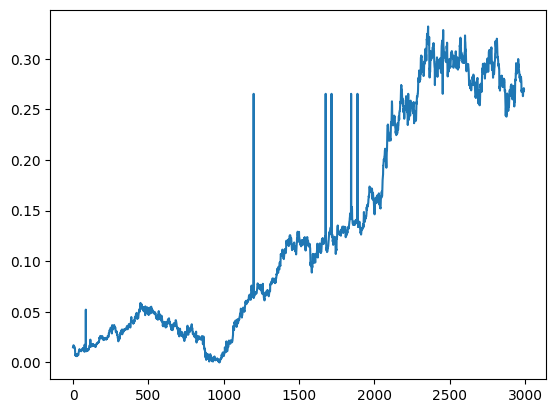

In [46]:
plt.plot(y_train)

94/94 [==============================] - 3s 33ms/step


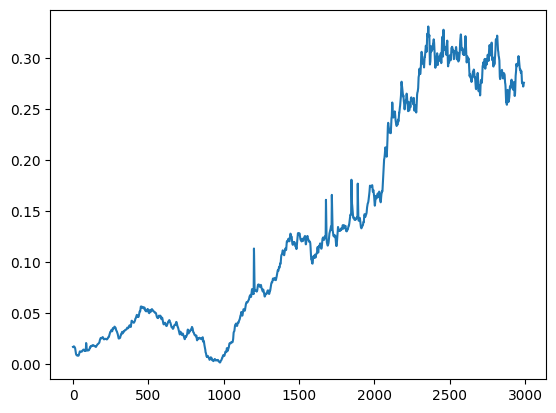

In [49]:
plt.plot(model.predict(x_train))

38/38 [==============================] - 1s 32ms/step


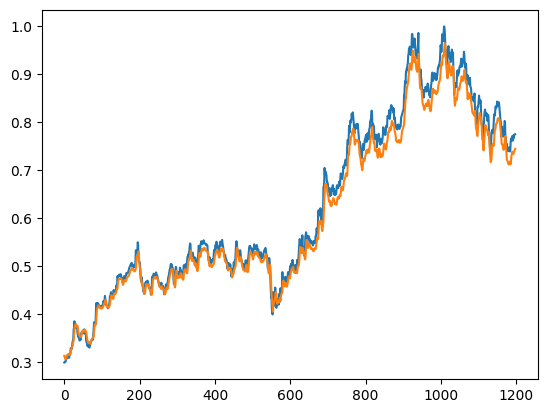

In [50]:
plt.plot(y_test)
plt.plot(model.predict(x_test))

# Data Visualization

**Showing the correlation between the variables**

In [52]:
corr_matrix = df.corr()
corr_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,target
0,1.000000,0.994170,0.993804,0.993420,0.993074,0.992786,0.992487,0.992212,0.991905,0.991644,0.991395,0.991161,0.990975,0.990740,0.990542,0.990272,0.990069,0.989854,0.989621,0.989434,0.989249,0.989075,0.988931,0.988795,0.988611,0.988437,0.988244,0.988040,0.987836,0.987642,0.987484,0.987384,0.987240,0.987094,0.987954,0.987739,0.987604,0.987431,0.987258,0.987724,0.986871,0.986705,0.986935,0.986318,0.986017,0.985762,0.985465,0.985183,0.984931,0.984707,0.984421,0.984197,0.983958,0.983697,0.983465,0.983269,0.983015,0.982761,0.982501,0.982237,0.981941,0.981726,0.981393,0.981085,0.980823,0.980536,0.980208,0.979858,0.979557,0.979298,0.979034,0.978769,0.978542,0.978374,0.978128,0.977946,0.977739,0.977572,0.977415,0.977241,0.977140,0.976987,0.976794,0.976626,0.976416,0.976223,0.975940,0.975710,0.975457,0.975286,0.975029,0.974863,0.974599,0.974391,0.974248,0.974013,0.973770,0.973519,0.973289,0.973083,0.972855,0.972649,0.972452,0.972325,0.972084,0.971856,0.971683,0.971511,0.971284,0.971007,0.970788,0.970573,0.970320,0.970108,0.969973,0.969824,0.969684,0.969559,0.969415,0.969308,0.969167,0.969034,0.968834,0.968696,0.968480,0.968211,0.967968,0.967725,0.967493,0.967224,0.967526,0.966776,0.966571,0.966401,0.966209,0.966014,0.965781,0.965464,0.965242,0.964949,0.964728,0.964556,0.964408,0.964185,0.963926,0.963678,0.963431,0.963194,0.962877,0.962585,0.962263
1,0.994170,1.000000,0.994172,0.993807,0.993422,0.993076,0.992788,0.992488,0.992213,0.991905,0.991645,0.991396,0.991163,0.990977,0.990743,0.990545,0.990275,0.990071,0.989856,0.989624,0.989437,0.989251,0.989074,0.988930,0.988794,0.988611,0.988433,0.988237,0.988026,0.987812,0.987619,0.987468,0.987368,0.987216,0.988096,0.987934,0.987717,0.987588,0.987426,0.987255,0.987719,0.986866,0.986699,0.986927,0.986306,0.986000,0.985743,0.985447,0.985169,0.984916,0.984692,0.984407,0.984189,0.983952,0.983691,0.983464,0.983269,0.983012,0.982758,0.982496,0.982236,0.981941,0.981726,0.981395,0.981087,0.980825,0.980539,0.980211,0.979856,0.979553,0.979296,0.979033,0.978770,0.978543,0.978366,0.978121,0.977941,0.977734,0.977567,0.977411,0.977239,0.977141,0.976990,0.976794,0.976625,0.976403,0.976206,0.975926,0.975699,0.975446,0.975279,0.975027,0.974869,0.974606,0.974397,0.974255,0.974022,0.973779,0.973530,0.973300,0.973092,0.972865,0.972659,0.972462,0.972335,0.972094,0.971866,0.971693,0.971522,0.971295,0.971018,0.970800,0.970585,0.970332,0.970120,0.969985,0.969835,0.969694,0.969570,0.969425,0.969317,0.969175,0.969041,0.968842,0.968705,0.968487,0.968218,0.967973,0.967729,0.967499,0.967232,0.967534,0.966782,0.966576,0.966397,0.966206,0.966012,0.965777,0.965460,0.965238,0.964946,0.964726,0.964551,0.964399,0.964177,0.963924,0.963676,0.963427,0.963191,0.962876,0.962583
2,0.993804,0.994172,1.000000,0.994174,0.993809,0.993424,0.993078,0.992790,0.992489,0.992214,0.991907,0.991646,0.991399,0.991166,0.990980,0.990746,0.990548,0.990278,0.990074,0.989859,0.989627,0.989440,0.989250,0.989073,0.988929,0.988793,0.988607,0.988426,0.988224,0.988003,0.987790,0.987605,0.987454,0.987345,0.988218,0.988077,0.987912,0.987702,0.987585,0.987424,0.987250,0.987714,0.986861,0.986691,0.986916,0.986290,0.985982,0.985726,0.985433,0.985155,0.984902,0.984679,0.984400,0.984184,0.983948,0.983691,0.983464,0.983267,0.983010,0.982754,0.982495,0.982236,0.981942,0.981729,0.981398,0.981089,0.980829,0.980543,0.980210,0.979853,0.979552,0.979295,0.979034,0.978771,0.978535,0.978360,0.978116,0.977935,0.977729,0.977564,0.977409,0.977240,0.977144,0.976990,0.976792,0.976612,0.97

<Axes: >

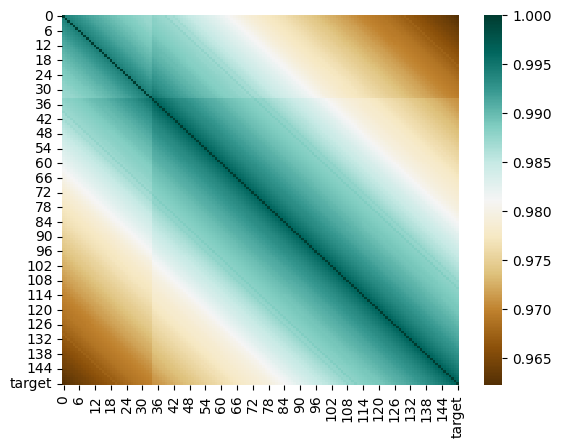

In [54]:
sns.heatmap(corr_matrix,cmap='BrBG')

**Target variable is Close**

**Scatter plot between Open and Close**

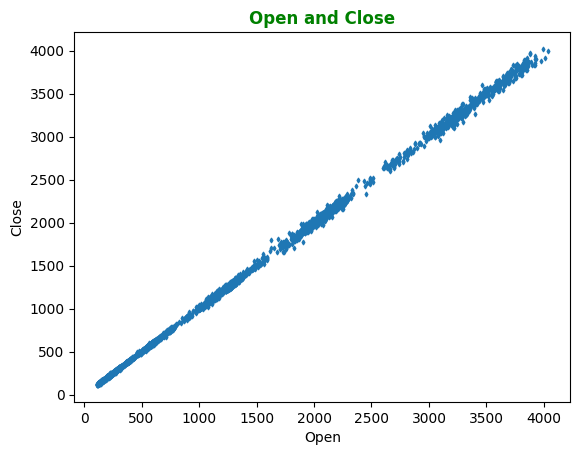

In [70]:
plt.scatter(df['Open'],df['Close'], marker ="d" , s=5)
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('Open and Close', weight = "bold", color="green")
plt.show()

**Scatter plot between High and Low**

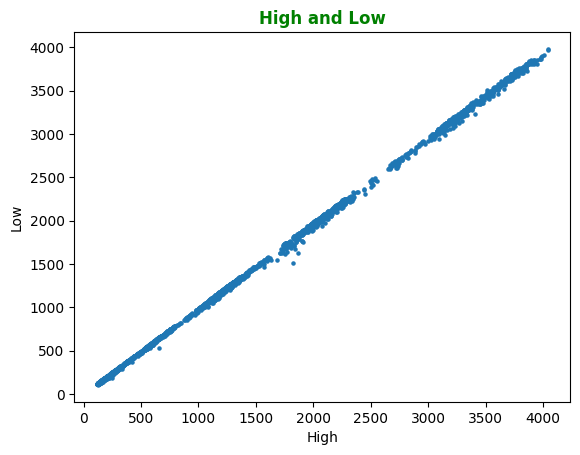

In [71]:
plt.scatter(df['High'],df['Low'], marker = "o", s= 5)
plt.xlabel('High')
plt.ylabel('Low')
plt.title('High and Low', weight= "bold", color ="green")
plt.show()

**Scatter plot between volume and High**

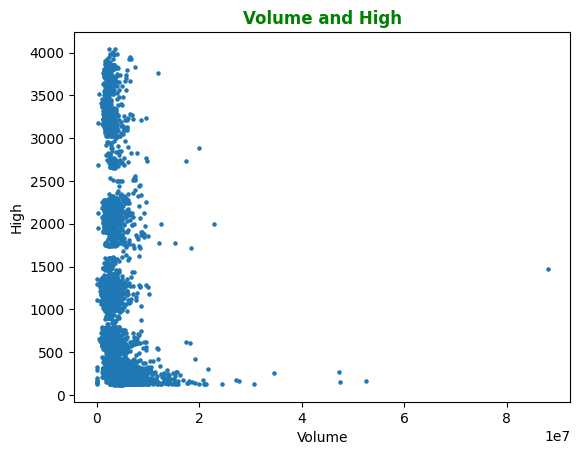

In [72]:
plt.scatter(df['Volume'],df['High'], marker = "o", s= 5)
plt.xlabel('Volume')
plt.ylabel('High')
plt.title('Volume and High', weight= "bold", color ="green")
plt.show()